## Support Vector Machine: SMO

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as scio

In [12]:
data = scio.loadmat('HW2_Data/data2')

In [13]:
X_trn = np.insert(data['X_trn'], 0, 1, axis=1)
y_trn = data['Y_trn']
X_tst = np.insert(data['X_tst'], 0, 1, axis=1)
y_tst = data['Y_tst']

In [14]:
X_train = np.matrix(X_trn)
y_train = np.matrix(y_trn)
X_test = np.matrix(X_tst)
y_test = np.matrix(y_tst)
y_train = np.where(y_train == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)
K = np.dot(X_train, X_train.T)

In [15]:
def dual(X, y, b, alpha, i):
    temp = np.multiply(alpha, y)
    return temp.T * K[:, i] + b

In [16]:
def compute_eta(i, j):
    return 2 * K[i, j] - K[i, i] - K[j, j]

In [17]:
def new_alphaj_value(alpha, y, Ei, Ej, eta, L, H):
    temp = alpha - (y * (Ei - Ej)) / eta
    if temp > H:
        return H
    elif temp < L:
        return L
    else:
        return temp

In [18]:
def compute_b(b1, b2, alphai, alphaj, C):
    if 0 < alphai and alphai < C:
        return b1
    elif 0 < alphaj and alphaj < C:
        return b2
    else:
        return (b1 + b2) / 2

In [19]:
def smo(X, y, C, tolerance, max_passes):
    alpha = np.matrix(np.zeros(X.shape[0]))
    alpha = alpha.T
    b = 0
    while passes < max_passes:
        num_changed_alphas = 0
        for i in range(len(X)):
            Ei = dual(X, y, b, alpha, i) - y[i]
            if (y[i] * Ei < -tolerance and alpha[i] < C) or (y[i] * Ei > tolerance and alpha[i] > 0):
                j = np.random.choice(len(X))
                while j == i:
                    j = np.random.choice(len(X))
                    
                Ej = dual(X, y, b, alpha, j) - y[j]
                old_alpha_i = alpha.item(i)
                old_alpha_j = alpha.item(j)
                
                if y[i] != y[j]:
                    L = max(0, alpha[j] - alpha[i])
                    H = min(C, C + alpha[j] - alpha[i])
                else:
                    L = max(0, alpha[i] + alpha[j] - C)
                    H = min(C, alpha[i] + alpha[j])
                    
                if L == H:
                    continue
                
                eta = compute_eta(i, j)
                if eta >= 0:
                    continue
                    
                alpha[j] = new_alphaj_value(alpha[j], y[j], Ei, Ej, eta, L, H)
                
                if abs(alpha[j] - old_alpha_j) < 0.00001:
                    continue
                
                alpha[i] = alpha[i] + (y[i] * y[j] * (old_alpha_j - alpha[j]))
                
#                 # Compute b1 and b2
#                 b_1 = b - Ei - y[i]*(alpha[i] - old_alpha_i)* K[i,i] - y[j] *(alpha[j] - old_alpha_j)*K[i,j]
#                 b_2 = b - Ej - y[i]*(alpha[i] - old_alpha_i)* K[i,j] - y[j] *(alpha[j] - old_alpha_j)*K[j,j]

#                 b = b_1 if (alpha[i]>0 and alpha[i]<C) else(b_2 if (alpha[j]>0 and alpha[j]<C) else (b_1+b_2)/2)
                
                b1 = b - Ei - y[i] * (alpha[i] - old_alpha_i) * K[i, i] - y[j] * (alpha[j] - old_alpha_j) * K[i, j]
                b2 = b - Ej - y[i] * (alpha[i] - old_alpha_i) * K[i, j] - y[j] * (alpha[j] - old_alpha_j) * K[j, j]
                b = compute_b(b1, b2, alpha[i], alpha[j], C)
                
                num_changed_alphas += 1
        if num_changed_alphas == 0:
            passes += 1
        else:
            passes = 0
    return alpha, b        
                
                

In [20]:
C=1
tolerance = 0.0001
max_passes = 3
alpha, b = smo(X_train, y_train, C, tolerance, max_passes)

In [21]:
alpha

matrix([[ 1.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.0209716 ],
        [ 0.        ],
        [ 1.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.84893343],
        [ 0.        ],
        [ 1.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.86879467],
        [ 0.40464675],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.02266008],
        [ 0

In [22]:
b

matrix([[ 0.61548866]])

In [23]:
temp1 = np.matrix(np.multiply(alpha,y_train))
theta_smo = np.dot(temp1.T,X_train)

In [24]:
def plotPrediction(X, y, theta, title = 'train set'):
    X = np.concatenate((X, y), axis=1)
    X = np.array(X)
    X1 = X[np.ix_(X[:, 3] == -1, (1,2))]
    X2 = X[np.ix_(X[:, 3] == 1, (1,2))]
    minimum = np.floor(X2.min())
    maximum = np.ceil(X2.max())
    plt.scatter(X1[:, 0], X1[:, 1], marker='+', color="blue", label="Class 0")
    plt.scatter(X2[:, 0], X2[:, 1], marker='o', color="green", label="Class 1")
    x = np.linspace(-3, 3, 10)
    theta=np.array(theta)
    slope = -theta[:,1]/theta[:,2]
    intercept = -theta[:, 0]/theta[:,2]
    y_pred = slope*x + intercept
    plt.ylim(minimum, maximum)
    plt.plot(x, y_pred, color='red', label="Boundary")
    plt.title(title)
    plt.legend()
    plt.show()

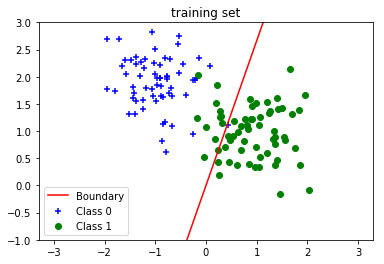

In [25]:
plotPrediction(X_train, y_train, theta_smo,"training set")

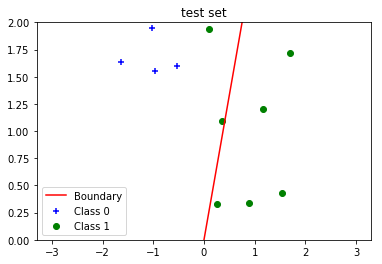

In [26]:
plotPrediction(X_test, y_test, theta_smo, "test set")

In [32]:
def classify(X, y, theta):
    res = sigmoid(X*theta.T)
    for i in range(len(res)):
        if res[i] < 0.5:
            res[i] = 0
        else:
            res[i] = 1
    return res

def classificationError(y, y_pred):
    count = 0
    for i in range(len(y)):
        if y_pred[i] != y[i]:
            count += 1
    return count

In [33]:
def classification_error_print(X_train, y_train, theta):
    y_pred = classify(X_train, y_train, theta)
    classification_error = classificationError(y_train, y_pred)
    classification_error_percent =  classification_error / len(y_pred) * 100
    print("Miss-classified points:", classification_error)
    print("The classification error percent is: {:0.2f}%".format(classification_error_percent))

In [34]:
classification_error(X_train, y_train, theta_smo)

NameError: name 'sigmoid' is not defined

In [35]:
classification_error(X_test, y_test, theta_smo)

NameError: name 'sigmoid' is not defined